In [ ]:
'''
House Price Prediction using one feature(area)
Author - Sumant Kumar
Date - 28/10/2023
'''

In [43]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# import dataset
house_df = pd.read_csv(r"C:\Users\Sumant\Documents\Machine Learning\Datasets\Housing.csv")

In [10]:
# show dataset
house_df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
# All information about dataset
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [13]:
# Taking out area and price feature
area = house_df['area']
price = house_df['price']

print(area.head(5))
print(price.head(5))

0    7420
1    8960
2    9960
3    7500
4    7420
Name: area, dtype: int64
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


In [14]:
# Check null values
print(area.isnull().sum())
print(price.isnull().sum())

0
0


In [16]:
# Convert dataframe to numpy array
print(type(area))
X = area.to_numpy()
Y = price.to_numpy()
print(type(X))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [26]:
# scaling the input feature(area)
scaled_X = StandardScaler().fit_transform(X.reshape(-1,1))
print(scaled_X[:5])

[[1.04672629]
 [1.75700953]
 [2.21823241]
 [1.08362412]
 [1.04672629]]


In [33]:
Y = Y.reshape(-1,1)
Y[:5]

array([[13300000],
       [12250000],
       [12250000],
       [12215000],
       [11410000]], dtype=int64)

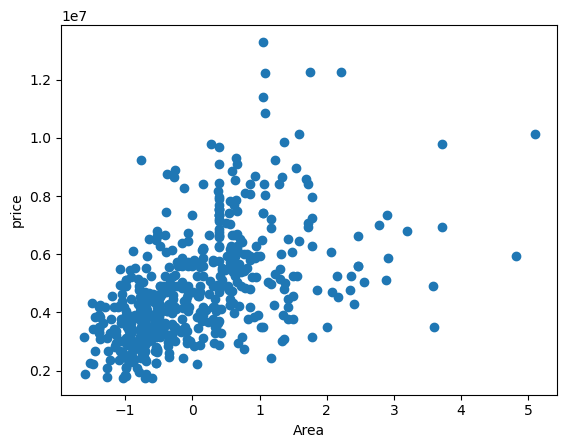

In [39]:
# Plotting the data
plt.scatter(scaled_X,Y)
plt.xlabel("Area");plt.ylabel("price")
plt.show()

In [36]:
# Splitting the data into train and test set
x_train,x_test,y_train,y_test = train_test_split(scaled_X,Y,random_state=12,test_size=.25,shuffle=True)

In [41]:
print(f"Training Size = {x_train.shape}")
print(f"Testing Size = {x_test.shape}")

Training Size = (408, 1)
Testing Size = (137, 1)


In [42]:
# Apply simple linear regression model
reg_object = linear_model.LinearRegression()
reg_object.fit(x_train,y_train)

LinearRegression()

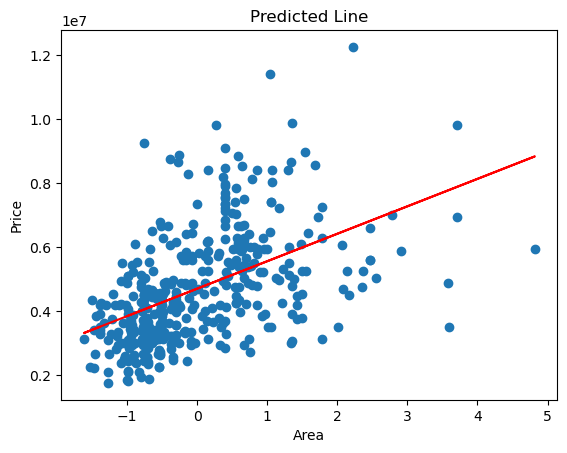

In [58]:
# Show Prediction Line on training set
plt.scatter(x_train,y_train)
plt.plot(x_train,reg_object.predict(x_train),color='r')
plt.xlabel("Area");plt.ylabel("Price")
plt.title("Predicted Line")
plt.show()

In [48]:
# Predict the price on test set
y_predict = reg_object.predict(x_test)

In [55]:
# The intercepts
print("Y-intercept = ",reg_object.intercept_)
# The coefficients
print("Coefficients: ", reg_object.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predict))
# R2 score (1 is perfect prediction)
print("R2 Score: %.2f" % r2_score(y_test, y_predict))

Y-intercept =  [4707030.35506128]
Coefficients:  [[856445.28920276]]
Mean squared error: 3274087658202.38
R2 Score: 0.34


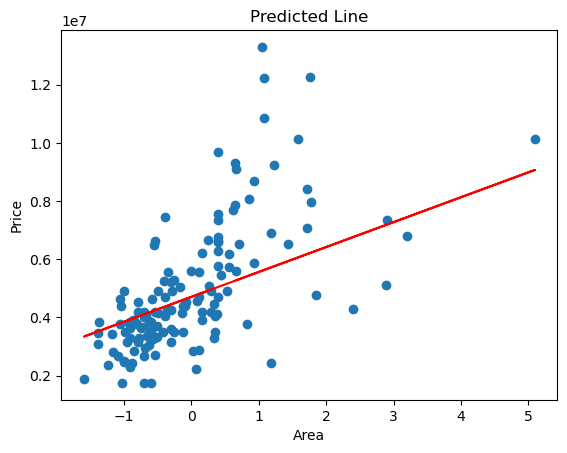

In [57]:
# Show Prediction Line on Testing set
plt.scatter(x_test,y_test)
plt.plot(x_test,y_predict,color='r')
plt.xlabel("Area");plt.ylabel("Price")
plt.title("Predicted Line")
plt.show()